# Big Data Assignment - Mia Campbell 

## Importing relevant libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import os, psutil
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from bokeh.palettes import Magma


%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

import json # In order to upload the dataset

## Importing the dataset

In [2]:
data_file = open('arxiv-metadata-oai-snapshot.json', 'r')

In [3]:
paperslist = []
## for every item in the json file, append into the list. 
for i in data_file:
    paperslist.append(json.loads(i))

In [4]:
## normalising the list 
df = pd.json_normalize(paperslist)

## deleting the list to save memory
del(paperslist)
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


# Data Wrangling: You must generate a clean version of the dataset. 

##### I want to see the how many rows and columns I have within the dataset

In [5]:
print('How many rows are in the dataset: ', df['id'].count() )
print('How many columns are in the dataset: ', len(df.columns))

How many rows are in the dataset:  2064797
How many columns are in the dataset:  14


##### Count null values in each column using .isnull() and .sum()

In [6]:
print(df.isnull().sum())

id                      0
submitter           15189
authors                 0
title                   0
comments           461680
journal-ref       1302983
doi               1019807
report-no         1894170
categories              0
license            452893
abstract                0
versions                0
update_date             0
authors_parsed          0
dtype: int64


##### Checking what data type is stored in each column

In [7]:
df.dtypes.value_counts()

object    14
dtype: int64

## 1. The task is to create a new dataset with the following requirements:

### 1.1 The dataset only requires the 5 columns listed: id, title, comments, journal-ref and categories. 

##### In order to achieve this, I just selected the columns I wanted and overwrote the dataset

In [8]:
df = df[['id','title','comments','journal-ref','categories']]
df.head()

,id,title,comments,journal-ref,categories
0,0704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph
1,0704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,math.CO cs.CG
2,0704.0003,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,physics.gen-ph
3,0704.0004,A determinant of Stirling cycle numbers counts...,11 pages,None,math.CO
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",math.CA math.FA


### 1.2 Create a new dataset only records containing comments

##### Summerising how many papers do not have comments

In [9]:
print(df['comments'].isnull().sum())

461680


##### Drop papers from the dataset wherever the column 'comments' has a null value using .dropna()

In [10]:
df = df.dropna(axis=0, subset=['comments'])

##### Making sure the papers with no comments have been dropped from the dataset.

In [11]:
print(df['comments'].isnull().sum())

0


In [12]:
print('How many rows are in the dataset: ', df['id'].count() )

How many rows are in the dataset:  1603117


##### The rows in the dataset are currently 1603117, previously 2064797 but we removed 461680 entries due to the comments being null

### 1.3 The new dataset should exclude any records with the word COVID in the title. 

##### Identifying entries in the dataset that contain the word 'COVID' in the title

In [13]:
title = df['title']
containcovid = title.str.contains('COVID')
df[containcovid]

,id,title,comments,journal-ref,categories
992550,1806.06910,Detection of Bio-aerosols and COVID-19 Equival...,"Updated title, references, introduction and mo...",None,physics.app-ph physics.ins-det physics.optics
1218089,1912.06193,Changes to the extreme and erratic behaviour o...,Accepted manuscript. Numerous minor edits comp...,Physica A: Statistical Mechanics and its Appli...,q-fin.MF cs.LG math.DS q-fin.CP
1240944,2002.03521,UGRWO-Sampling for COVID-19 dataset: A modifie...,"43 pages, 4 figures, 9 tables",None,cs.LG cs.CV stat.ML
1242719,2002.05296,Insights from early mathematical models of 201...,35 pages,Journal of Environmental Science and Managemen...,q-bio.PE
1242749,2002.05326,Multivariate time series approximation by mult...,arXiv admin note: substantial text overlap wit...,None,physics.soc-ph math.ST stat.TH
...,...,...,...,...,...
1648429,2205.04017,What Do You Get from Turning on Your Video? Ef...,The paper has been accepted by CSCW 2022 and t...,None,cs.HC
1648579,2205.04167,Performance assessment of medical and non-medi...,"This paper, even if paginated folowing ACTA IM...",None,eess.SP
1648702,2205.04290,Time-Varying Causality Between Bitcoin and Att...,"14 pages, 4 figures, 1 table",None,q-fin.GN
1649444,2205.05032,Brazilian COVID-19 data streaming,"12 pages, 6 figures, 2 tables",None,cs.DB cs.DL q-bio.PE


#####  1877 entries contain papers with the word COVID

##### Overwrite the dataset with only entries where the column 'title' does NOT contain the word COVID

In [14]:
df = df[df['title'].str.contains('COVID')==False]

In [15]:
print('How many rows are in the dataset: ', df['id'].count())

How many rows are in the dataset:  1601240


##### The rows in the dataset are currently 1601240, previously 1603117 but we removed 1877 entries due to the titles containing the word 'COVID'

### 1.4 Further cleaning

##### Summerising how many papers do not have joutnal references

In [16]:
print(df['journal-ref'].isnull().sum())

950359


##### as 950359 papers out of the 1601240 papers in the dataset have no jounral references, as this is more than half, I will be removing papers that do not have a journal reference

In [17]:
df = df.dropna(axis=0, subset=['journal-ref'])
print(df['journal-ref'].isnull().sum())

0


##### The final shape of my data is 650881 rows, by 5 columns, with no null values. 

In [18]:
print('How many rows are in the dataset: ', df['id'].count() )
print('How many columns are in the dataset: ', len(df.columns))

How many rows are in the dataset:  650881
How many columns are in the dataset:  5


In [19]:
print(df.isnull().sum())

id             0
title          0
comments       0
journal-ref    0
categories     0
dtype: int64


### 1.5 Output new data set as a CSV file 

In [20]:
### resetting the index due to all the removed columns
df = df.reset_index(drop=True)
df.to_csv(r'C:\Users\miaca\Desktop\Final Coursework\ADA-BD\Assessment\cleandata.csv',header=True)

In [21]:
df = pd.read_csv('cleandata.csv', index_col=0)

c:\Users\miaca\conda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df.dtypes.value_counts()

object    5
dtype: int64

In [23]:
df.head()

,id,title,comments,journal-ref,categories
0,704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph
1,704.0007,Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match...","Phys.Rev.D76:044016,2007",gr-qc
2,704.0008,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",cond-mat.mtrl-sci
3,704.0015,Fermionic superstring loop amplitudes in the p...,22 pages; signs and coefficients adjusted for ...,"JHEP 0705:034,2007",hep-th
4,704.0016,Lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",hep-ph


# Descriptive analysis: You are expected to fully describe your data.

##  2. The task is to describe your data accompanied with the appropriate visualisations.

### 2.1 Exploring the 'Categories' column

#### Sub-categories

##### I noticed that some papers were assigned multiple categories, and that these categories were deliminated by ' '.
##### so I went ahead and split all the categories in each row, by ' ', using .split()

##### Creating a funtion to split string in a column and then append to an empty list

In [24]:
import pandas as pd
import numpy as np

def pars_string(file,col1):
    df=pd.read_csv(file)
    x=df[col1].value_counts().reset_index()
    x['index']=x['index'].str.split()
    # get the list from all of the answer
    df1=[]
    for i in range(x.shape[0]):
        for j in x['index'][i]:
            df1.append(j)
    return(df1)

In [25]:
## variable 'allcat' contains every category, not a unique value list.
allcat = pars_string(file='cleandata.csv', col1='categories')
#print(allcat)

C:\Users\miaca\AppData\Local\Temp/ipykernel_20512/1226330784.py:2: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  allcat = pars_string(file='cleandata.csv', col1='categories')


In [26]:
from collections import Counter
# Pass the list to instance of Counter class.
Counter = Counter(allcat)
# most_common() produces k frequently encountered
# input values and their respective counts.
allcatcommon = Counter.most_common(10)
#print(allcatcommon)
allcatcommondf = pd.DataFrame(allcatcommon, columns=['category', 'count'])
print(allcatcommondf)

             category  count
0             math-ph   3974
1             math.MP   3974
2            quant-ph   3871
3              hep-th   3707
4  cond-mat.stat-mech   3616
5              hep-ph   2327
6               gr-qc   1974
7               cs.LG   1856
8     physics.comp-ph   1724
9   cond-mat.mes-hall   1692


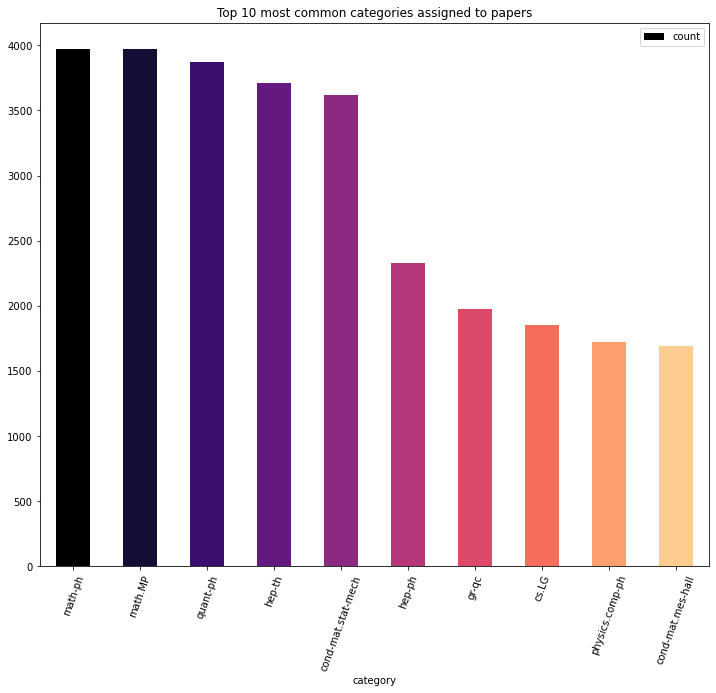

In [27]:
allcatcommondf.plot.bar(x="category", y="count",
 rot=70, title="Top 10 most common categories assigned to papers", color = Magma[11], figsize=(12,10))

plt.show(block=True)

In [28]:
allcatunique = list(set(allcat))
print (allcatunique)

['patt-sol', 'cs.FL', 'econ.GN', 'physics.hist-ph', 'stat.CO', 'stat.TH', 'math.MG', 'cmp-lg', 'math.RA', 'mtrl-th', 'q-fin.ST', 'q-fin.PR', 'physics.app-ph', 'physics.flu-dyn', 'cs.PF', 'math.GM', 'stat.OT', 'math.SP', 'math.CV', 'q-bio.OT', 'comp-gas', 'cs.CE', 'cond-mat', 'math.AC', 'physics.atm-clus', 'cs.SC', 'stat.ML', 'cs.MA', 'chao-dyn', 'cs.CV', 'nlin.AO', 'q-bio.GN', 'eess.AS', 'q-bio.SC', 'physics.plasm-ph', 'bayes-an', 'eess.SY', 'stat.ME', 'physics.ed-ph', 'alg-geom', 'math.AG', 'physics.ins-det', 'astro-ph.EP', 'cs.LO', 'cs.OS', 'eess.IV', 'q-fin.TR', 'cond-mat.str-el', 'astro-ph.IM', 'cs.RO', 'astro-ph.GA', 'math.GN', 'stat.AP', 'cs.SD', 'cs.AR', 'solv-int', 'hep-th', 'math.FA', 'physics.optics', 'adap-org', 'physics.atom-ph', 'cs.LG', 'q-bio.PE', 'cond-mat.quant-gas', 'math.RT', 'cs.DL', 'astro-ph', 'math.DS', 'cs.GL', 'physics.bio-ph', 'acc-phys', 'physics.med-ph', 'cs.IR', 'math.MP', 'cs.GT', 'math.AT', 'q-fin.CP', 'nlin.CD', 'math.SG', 'atom-ph', 'cs.AI', 'quant-ph',

#### General-categories

In [29]:
from collections import Counter
broadallcat = [i.split('.', 1)[0] for i in allcat]
# Pass the list to instance of Counter class.
Counter = Counter(broadallcat)
# most_common() produces k frequently encountered
# input values and their respective counts.
broadallcatcommon = Counter.most_common()


In [30]:
num_cat = len(broadallcatcommon)
print(f'There are {num_cat} categories, these are the following:')
print(broadallcatcommon)

There are 38 categories, these are the following:
[('math', 22520), ('physics', 16569), ('cs', 14688), ('cond-mat', 14482), ('astro-ph', 5338), ('nlin', 4422), ('math-ph', 3974), ('quant-ph', 3871), ('hep-th', 3707), ('q-bio', 3358), ('stat', 2934), ('hep-ph', 2327), ('gr-qc', 1974), ('nucl-th', 1470), ('q-fin', 1046), ('eess', 995), ('hep-lat', 798), ('hep-ex', 741), ('nucl-ex', 563), ('chao-dyn', 214), ('solv-int', 177), ('econ', 159), ('adap-org', 90), ('q-alg', 77), ('patt-sol', 67), ('funct-an', 59), ('dg-ga', 42), ('alg-geom', 35), ('chem-ph', 34), ('atom-ph', 33), ('comp-gas', 27), ('supr-con', 17), ('mtrl-th', 17), ('plasm-ph', 6), ('acc-phys', 3), ('bayes-an', 2), ('ao-sci', 2), ('cmp-lg', 1)]


In [31]:
broadallcatcommondf = pd.DataFrame(broadallcatcommon, columns=['category', 'count'])

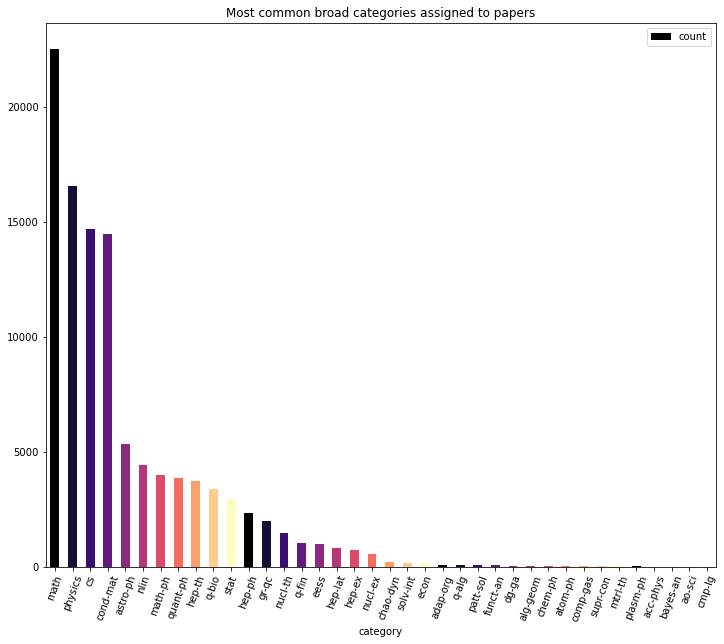

In [32]:
broadallcatcommondf.plot.bar(x="category", y="count",
 rot=70, title="Most common broad categories assigned to papers", color = Magma[11], figsize=(12,10))

plt.show(block=True)

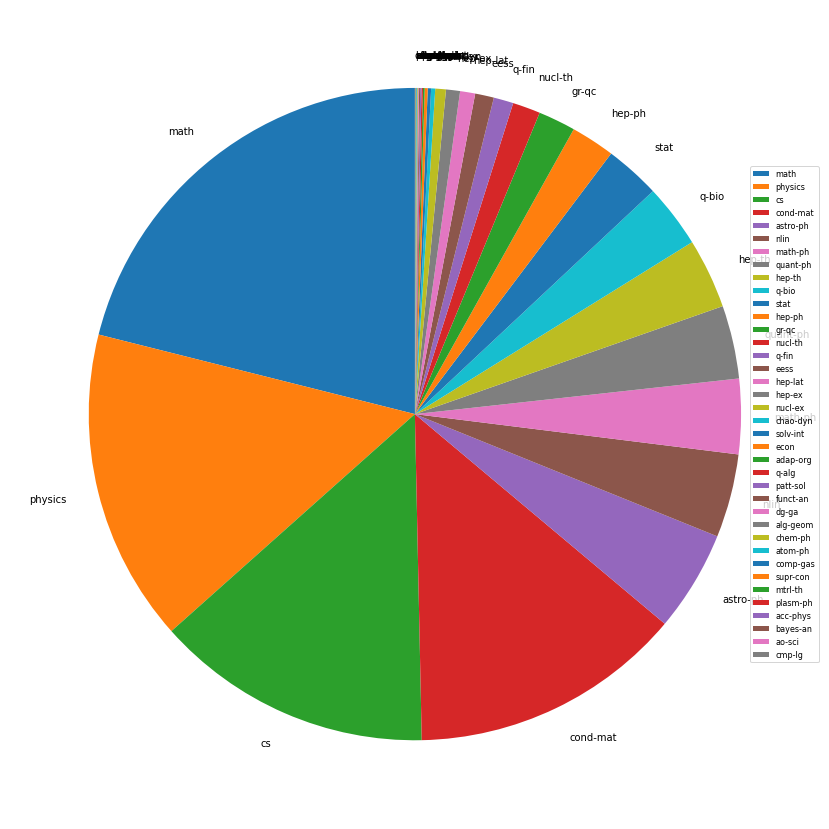

In [33]:

_, ax = plt.subplots(figsize = (15,15))

wedges,_= ax.pie(broadallcatcommondf['count']
                    ,labels=broadallcatcommondf["category"] 
                    ,shadow=False,startangle=90
                    ,textprops={'fontsize': 10})

ax.legend(wedges,broadallcatcommondf["category"], prop={'size': 8}, loc="right")

### 2.2 Exploring the 'titles' column

In [34]:
titlesplit = pars_string(file='cleandata.csv', col1='title')

C:\Users\miaca\AppData\Local\Temp/ipykernel_20512/4079681780.py:1: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  titlesplit = pars_string(file='cleandata.csv', col1='title')


In [35]:
uniquewords = list(set(titlesplit))
## print (uniquewords)

In [36]:
for i in range(len(titlesplit)):
    titlesplit[i] = titlesplit[i].lower()

In [37]:
worddf = pd.DataFrame(titlesplit, columns=['word'])
x = ["of", "in", "the", "and", "for", "a", "with", "on", "to", "from", "at", "an", "by","using"]
worddf = worddf[~worddf['word'].isin(x)]
wordlist = worddf['word'].tolist()


There are 42004415 words in the combination of all cells in column word.


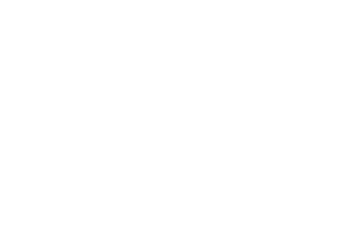

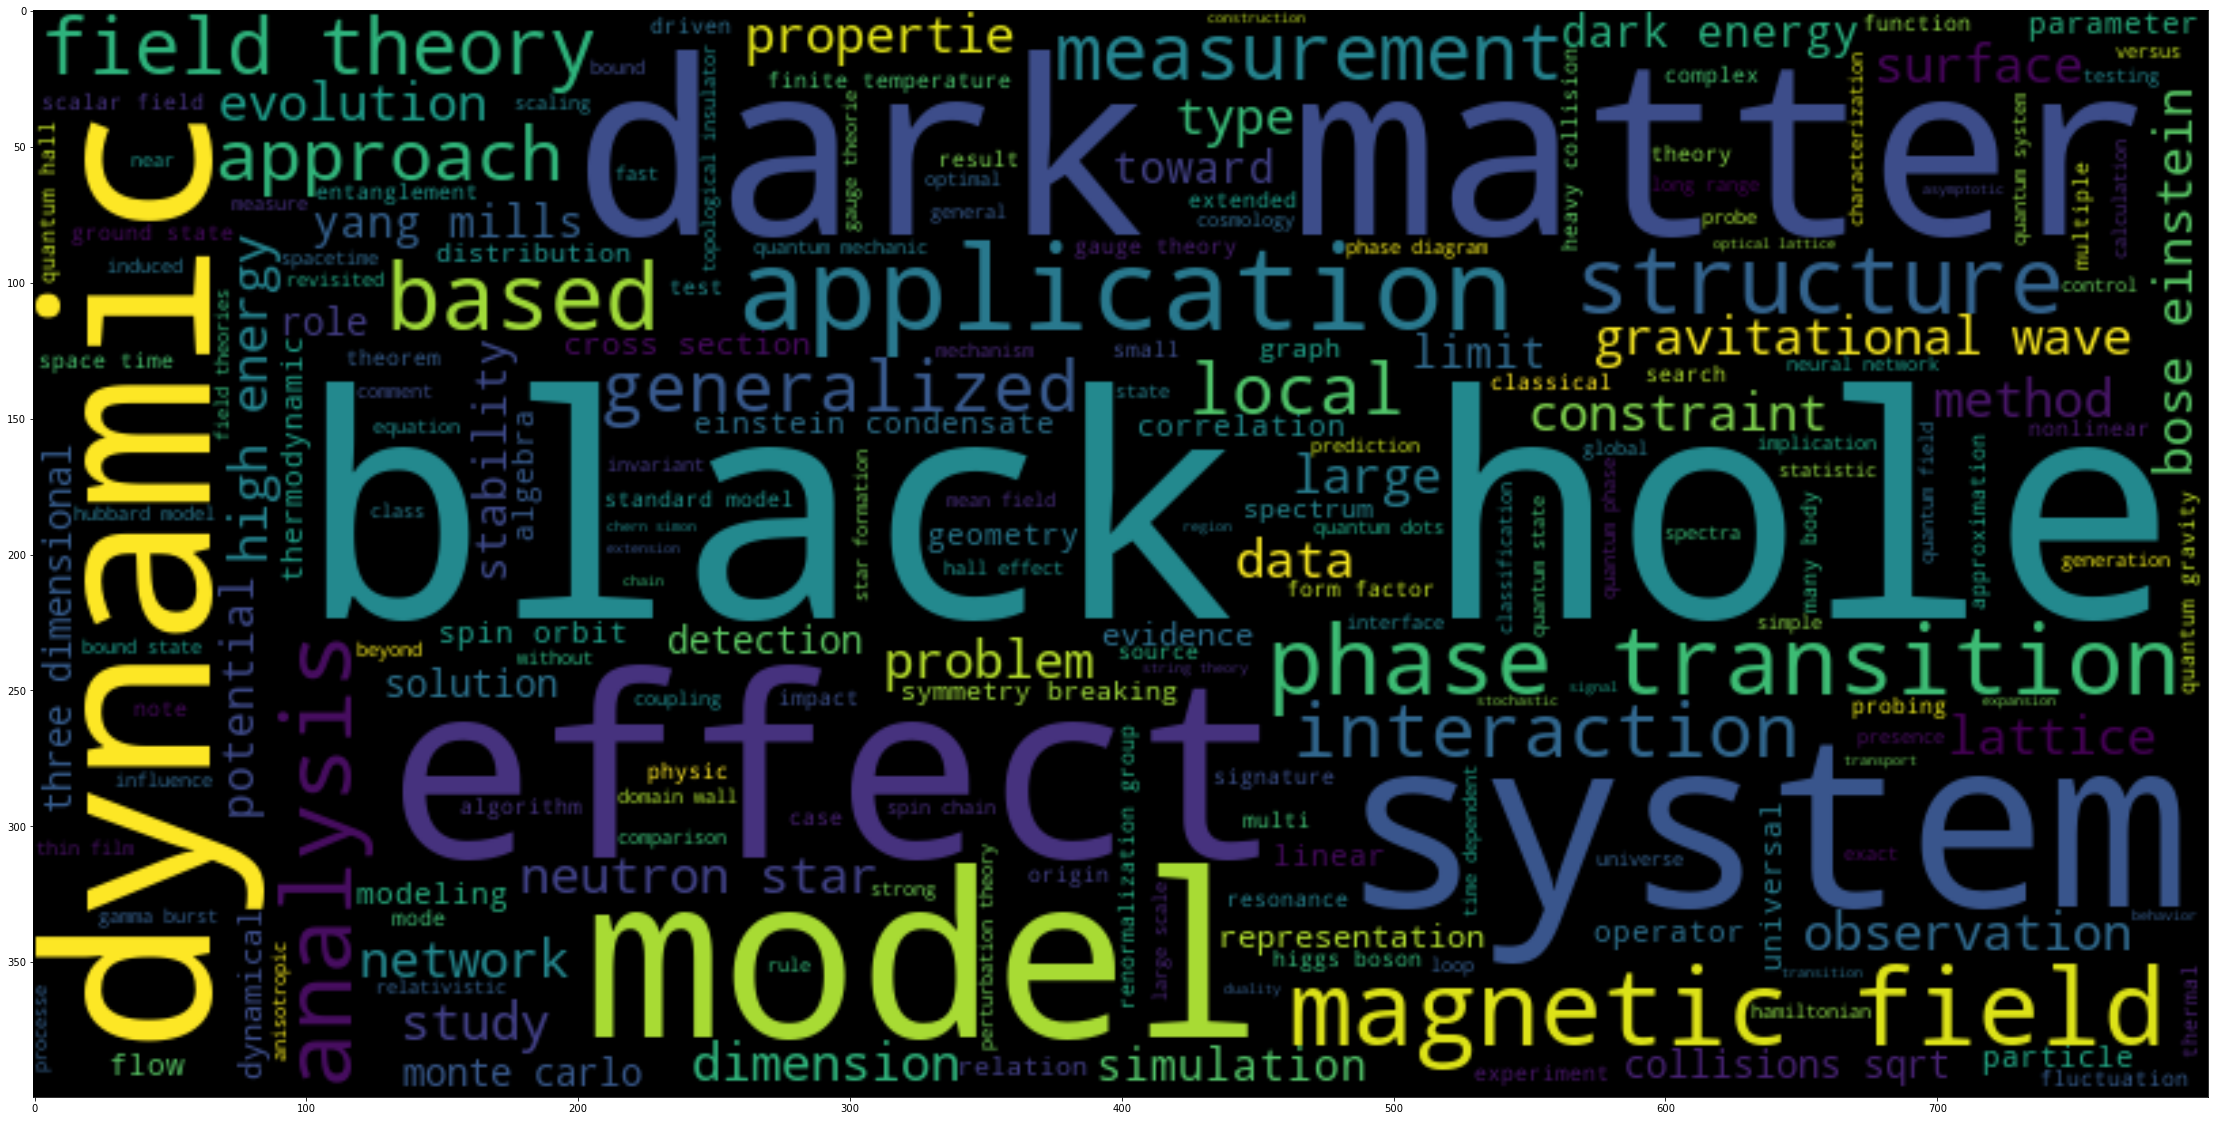

In [38]:
text = " ".join(review for review in worddf.word.astype(str))
print ("There are {} words in the combination of all cells in column word.".format(len(text)))


# remove words that we want to exclude
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(background_color="black", width=800, height=400, normalize_plurals=True, repeat=False, min_word_length=4 ).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [39]:
from collections import Counter
# Pass the list to instance of Counter class.
Counter = Counter(wordlist)
# most_common() produces k frequently encountered
# input values and their respective counts.
commonword = Counter.most_common(10)
#print(allcatcommon)
commonworddf = pd.DataFrame(commonword, columns=['word', 'count'])
print(commonworddf)

       word  count
0   quantum  53697
1     model  32885
2    theory  24506
3     field  18980
4  magnetic  16095
5   systems  15613
6      spin  15595
7    models  15140
8     phase  15044
9    energy  14411


#### Relationship between journal and category.

i noticed that most, if not all, the values in the jounral-ref column have a year i plan on using this to see if there are any particular trends for categories in certain years

In [49]:
df=pd.read_csv('cleandata.csv', index_col=0)
#### removing none digit values from the column journal-ref
df['categories'] = df['categories'].str.split()
df['journal-ref'] = df['journal-ref'].str.replace(r'\D+', '')
#df['journal-ref']


c:\Users\miaca\conda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\miaca\AppData\Local\Temp/ipykernel_20512/2261189554.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['journal-ref'] = df['journal-ref'].str.replace(r'\D+', '')


In [50]:
#clean up, I'm apologetic for the following lines of code, 
# it could be so much shorter, i couldnt get loops to work.
#replacing irrelevant content in journal ref with the year
year = df['journal-ref'].str.contains('1991')
df.loc[year,'journal-ref'] = '1991'
year = df['journal-ref'].str.contains('1992')
df.loc[year,'journal-ref'] = '1992'
year = df['journal-ref'].str.contains('1993')
df.loc[year,'journal-ref'] = '1993'
year = df['journal-ref'].str.contains('1994')
df.loc[year,'journal-ref'] = '1994'
year = df['journal-ref'].str.contains('1994')
df.loc[year,'journal-ref'] = '1994'
year = df['journal-ref'].str.contains('1995')
df.loc[year,'journal-ref'] = '1995'
year = df['journal-ref'].str.contains('1996')
df.loc[year,'journal-ref'] = '1996'
year = df['journal-ref'].str.contains('1997')
df.loc[year,'journal-ref'] = '1997'
year = df['journal-ref'].str.contains('1998')
df.loc[year,'journal-ref'] = '1998'
year = df['journal-ref'].str.contains('1999')
df.loc[year,'journal-ref'] = '1999'
year = df['journal-ref'].str.contains('2000')
df.loc[year,'journal-ref'] = '2000'
year = df['journal-ref'].str.contains('2001')
df.loc[year,'journal-ref'] = '2001'
year = df['journal-ref'].str.contains('2002')
df.loc[year,'journal-ref'] = '2002'
year = df['journal-ref'].str.contains('2003')
df.loc[year,'journal-ref'] = '2003'
year = df['journal-ref'].str.contains('2004')
df.loc[year,'journal-ref'] = '2004'
year = df['journal-ref'].str.contains('2005')
df.loc[year,'journal-ref'] = '2005'
year = df['journal-ref'].str.contains('2006')
df.loc[year,'journal-ref'] = '2006'
year = df['journal-ref'].str.contains('2007')
df.loc[year,'journal-ref'] = '2007'
year = df['journal-ref'].str.contains('2008')
df.loc[year,'journal-ref'] = '2008'
year = df['journal-ref'].str.contains('2009')
df.loc[year,'journal-ref'] = '2009'
year = df['journal-ref'].str.contains('2010')
df.loc[year,'journal-ref'] = '2010'
year = df['journal-ref'].str.contains('2011')
df.loc[year,'journal-ref'] = '2011'
year = df['journal-ref'].str.contains('2012')
df.loc[year,'journal-ref'] = '2012'
year = df['journal-ref'].str.contains('2013')
df.loc[year,'journal-ref'] = '2013'
year = df['journal-ref'].str.contains('2014')
df.loc[year,'journal-ref'] = '2014'
year = df['journal-ref'].str.contains('2015')
df.loc[year,'journal-ref'] = '2015'
year = df['journal-ref'].str.contains('2016')
df.loc[year,'journal-ref'] = '2016'
year = df['journal-ref'].str.contains('2018')
df.loc[year,'journal-ref'] = '2018'
year = df['journal-ref'].str.contains('2019')
df.loc[year,'journal-ref'] = '2019'
year = df['journal-ref'].str.contains('2020')
df.loc[year,'journal-ref'] = '2020'
year = df['journal-ref'].str.contains('2021')
df.loc[year,'journal-ref'] = '2021'
year = df['journal-ref'].str.contains('2022')
df.loc[year,'journal-ref'] = '2022'
#df.tail(50)


In [60]:
year = list(df['journal-ref'])
from collections import Counter
# Pass the list to instance of Counter class.
Counter = Counter(year)
# most_common() produces k frequently encountered
# input values and their respective counts.
commonyears = Counter.most_common(32)
#print(allcatcommon)
commonyeardf = pd.DataFrame(commonyears, columns=['journal-ref', 'count'])
print(commonyeardf)

   journal-ref  count
0         2019  32799
1         2018  31427
2         2021  31132
3         2016  30379
4         2020  29482
5         2010  29089
6         2015  28555
7         2014  28472
8         2009  28272
9         2011  27365
10        2012  27356
11        2013  27057
12        2007  26369
13        2006  26261
14        2008  25556
15        2005  24580
16        2004  22903
17        2003  21378
18        2002  19933
19        2001  18180
20        2000  15191
21        1999  12921
22        1998  11644
23        1997   9436
24        1996   8037
25        2022   8003
26        1995   6587
27        1994   5072
28        1993   3398
29        1992   2208
30        2017    806
31        1991    524


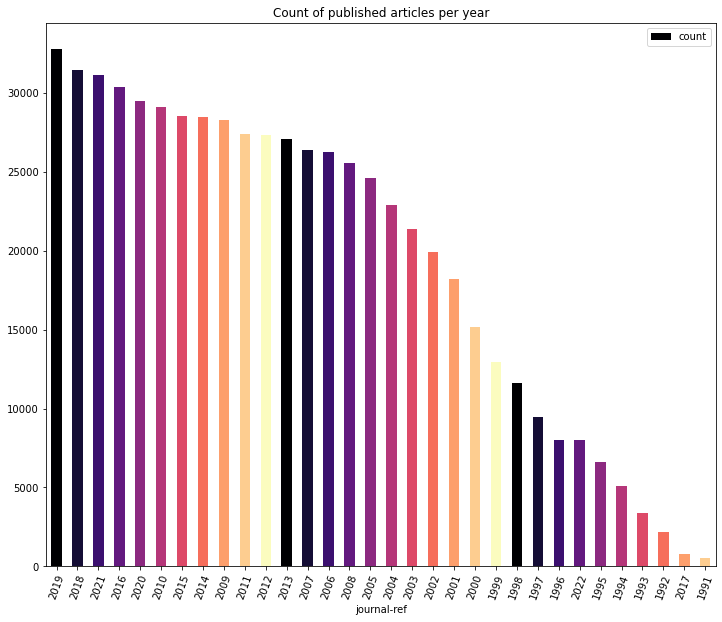

In [63]:
commonyeardf.plot.bar(x="journal-ref", y="count",
 rot=70, title="Count of published articles per year", color = Magma[11], figsize=(12,10))

plt.show(block=True)

In [ ]:

### create a dataframe with journal-ref and categories,
### for the last 30 years, specified in x 
catyear_df = pd.DataFrame(df, columns=['journal-ref','categories'])
x = ["1992", "1993","1994","1995","1996","1997","1998","1999","2000","2000","2002","2003","2004","2005","2006","2007","2008","2009","2010",
"2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
catyear_df = catyear_df[catyear_df['journal-ref'].isin(x)]

#catyear_df.head(50)

In [51]:
## grouping categories by year
#import itertools
#regular_list = [[1, 2, 3, 4], [5, 6, 7], [8, 9, 10]]
#flat_list = list(itertools.chain(*regular_list))

grouped_df = catyear_df.groupby('journal-ref')
grouped_lists = grouped_df['categories'].apply(list)
grouped_lists = grouped_lists.reset_index()
#print(grouped_lists)

In [58]:
## getting it back into the form of a dataframe so i can do further analysis
catyear_df = pd.DataFrame(grouped_lists, columns = ['journal-ref','categories'])
print(catyear_df)

   journal-ref                                         categories
0         1992  [[astro-ph], [astro-ph], [hep-ph], [math.HO, m...
1         1993  [[astro-ph], [hep-ph], [hep-ph, hep-th, physic...
2         1994  [[cs.NE, cs.CV, cs.SD], [math.RT], [astro-ph],...
3         1995  [[cond-mat.mtrl-sci], [physics.geo-ph, astro-p...
4         1996  [[math.GT], [math.QA, math.GR], [math.MG, math...
5         1997  [[math.GM], [cs.AI, cs.CV], [math.CO], [math.G...
6         1998  [[nucl-th], [cs.SD, cs.CV], [cs.NE], [physics....
7         1999  [[hep-ph], [astro-ph], [math.CA, math.NT], [ma...
8         2000  [[cond-mat.mtrl-sci], [physics.gen-ph], [hep-t...
9         2002  [[astro-ph], [hep-ex, hep-lat, hep-ph], [nucl-...
10        2003  [[math.FA], [hep-ph], [astro-ph], [hep-ph], [c...
11        2004  [[cond-mat.mes-hall], [math.FA, math.AP], [ast...
12        2005  [[hep-ex], [cond-mat.str-el], [physics.data-an...
13        2006  [[physics.optics, physics.comp-ph], [physics.o...
14        

In [53]:
catyear_df.to_csv(r'C:\Users\miaca\Desktop\Final Coursework\ADA-BD\Assessment\catyear.csv',header=True)

## Action: You need to provide a sensible recommendation based only on the assigned task and your analysis.	

In [45]:
# function that will search the dataframe for a specific word
def recommend(word):   
    df=pd.read_csv('cleandata.csv', index_col=0)
    title = df['title'].str.lower()
    recommended = title.str.contains(word)
    print(df[recommended].head(1))

In [46]:
recommend(word='energy')

C:\Users\miaca\AppData\Local\Temp/ipykernel_20512/1113751052.py:1: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  recommend(word='energy')


          id                                              title  \
41  704.0092  Energy density for chiral lattice fermions wit...   

                                             comments  \
41  Minor changes in the text. Version to appear i...   

                 journal-ref      categories  
41  Phys.Rev.D76:054502,2007  hep-lat hep-ph  


In [47]:
## a function that will search the dataframe for a specific word AND a specific category
def recommendoncat(word, cat):   
    df=pd.read_csv('cleandata.csv', index_col=0)

    title = df['title'].str.lower()
    category = df['categories'].str.lower()
    cat_reccomended = np.where(title.str.contains(word) & category.str.contains(cat))
    print(cat_reccomended[0])


In [48]:
recommendoncat(word='energy', cat='hep-th')

C:\Users\miaca\AppData\Local\Temp/ipykernel_20512/2687091444.py:1: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  recommendoncat(word='energy', cat='hep-th')


[    82    355    560 ... 649582 650680 650760]
